In [ ]:
#Mount our google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#To get the average frame count
import json
import glob
import numpy as np
import cv2
import copy
#change the path accordingly
video_files =  glob.glob('/content/drive/MyDrive/BE project/Celeb-real/*.mp4')
#video_files1 =  glob.glob('/content/dfdc_train_part_0/*.mp4')
#video_files += video_files1
frame_count = []
for video_file in video_files:
  cap = cv2.VideoCapture(video_file)
  if(int(cap.get(cv2.CAP_PROP_FRAME_COUNT))<150):
    video_files.remove(video_file)
    continue
  frame_count.append(int(cap.get(cv2.CAP_PROP_FRAME_COUNT)))
print("frames" , frame_count)
print("Total number of videos: " , len(frame_count))
print('Average frame per video:',np.mean(frame_count))

frames [276, 338, 326, 201, 341, 272, 322, 328, 324, 327, 224, 308, 371, 350, 529, 323, 320, 247, 349, 435, 345, 469, 327, 380, 318, 314, 186, 319, 325, 333, 479, 464, 317, 310, 520, 308, 365, 322, 319, 165, 317, 199, 334, 325, 225, 534, 505, 262, 328, 178, 328, 315, 338, 324, 459, 409, 303, 239, 351, 517, 311, 315, 310, 323, 316, 321, 306, 243, 339, 337, 327, 315, 309, 288, 330, 336, 172, 311, 318, 331, 307, 338, 350, 318, 331, 249, 347, 321, 313, 341, 334, 315, 315, 329, 319, 458, 463, 357, 307, 373, 306, 305, 441, 321, 319, 316, 209, 458, 228, 535, 256, 331, 306, 475, 502, 425, 322, 307, 376, 161, 397, 313, 306, 335, 316, 338, 270, 463, 371, 329, 324, 267, 215, 336, 320, 320, 237, 334, 350, 315, 309, 313, 314, 310, 321, 327, 335, 295, 330, 333, 314, 339, 379, 364, 398, 376, 330, 489, 510, 390, 466, 459, 332, 459, 452, 333, 400, 309, 352, 340, 308, 306, 312, 305, 334, 315, 325, 315, 303, 337, 284, 363, 410, 317, 316, 334, 347, 412, 337, 311, 306, 519, 422, 335, 400, 451, 337, 298, 26

In [ ]:
# to extract frame
def frame_extract(path):
  vidObj = cv2.VideoCapture(path)
  success = 1
  while success:
      success, image = vidObj.read()
      if success:
          yield image
!pip3 install face_recognition

!mkdir '/content/drive/MyDrive/BE project/Celeb-real_Face_only_data'
import torch
import torchvision
from torchvision import transforms
from torch.utils.data import DataLoader
from torch.utils.data.dataset import Dataset
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
import face_recognition
from tqdm.autonotebook import tqdm
# process the frames
def create_face_videos(path_list,out_dir):
  already_present_count =  glob.glob(out_dir+'*.mp4')
  print("No of videos already present " , len(already_present_count))
  for path in tqdm(path_list):
    out_path = os.path.join(out_dir,path.split('/')[-1])
    file_exists = glob.glob(out_path)
    if(len(file_exists) != 0):
      print("File Already exists: " , out_path)
      continue
    frames = []
    flag = 0
    face_all = []
    frames1 = []
    out = cv2.VideoWriter(out_path,cv2.VideoWriter_fourcc('M','J','P','G'), 30, (112,112))
    for idx,frame in enumerate(frame_extract(path)):
      #if(idx % 3 == 0):
      if(idx <= 150):
        frames.append(frame)
        if(len(frames) == 4):
          faces = face_recognition.batch_face_locations(frames)
          for i,face in enumerate(faces):
            if(len(face) != 0):
              top,right,bottom,left = face[0]
            try:
              out.write(cv2.resize(frames[i][top:bottom,left:right,:],(112,112)))
            except:
              pass
          frames = []
    try:
      del top,right,bottom,left
    except:
      pass
    out.release()

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.1/100.1 MB 9.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566172 sha256=7a8f4d42cfcddf47d1db3d78b106416b452a1a9fc72a83b3fc3eaf61a9867552
  Stored in directory: /root/.cache/pip/wheels/7a/eb/cf/e9eced74122b679557f597bb7c8e4c739cfcac526db1fd523d
Successfully built face-recognition-models


<ipython-input-3-db392dd7a9d9>:22: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [ ]:
create_face_videos(video_files,'/content/drive/MyDrive/BE project/Celeb-real_Face_only_data/')

No of videos already present  0


  0%|          | 0/588 [00:00<?, ?it/s]

Before preprocessing

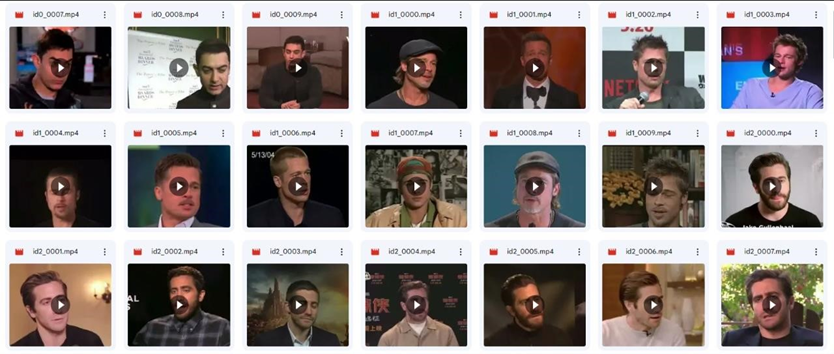

After preprocessing

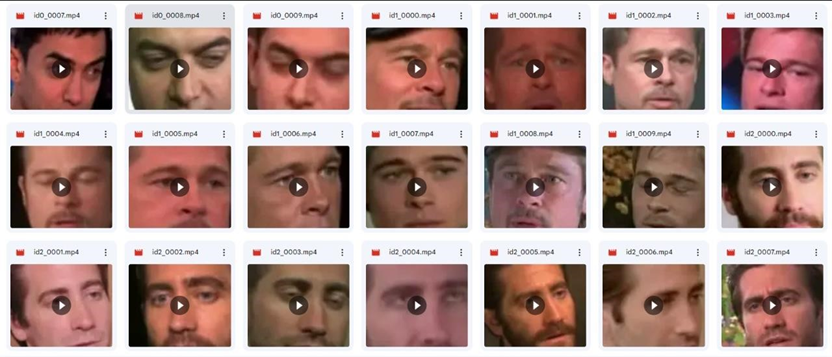